##Estatística Frequências e Medidas

*Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).*

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

In [ ]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

In [ ]:
enem = pd.read_json("enem_2023.json")

In [ ]:
enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem



**1. Qual das disciplinas tem a maior amplitude de nota?**

In [ ]:
def describe_new(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

In [ ]:
describe_new(enem)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035
variancia,7057.564698,6054.632515,6203.201190,7507.893239,13303.309244


*Ao analisar os resultados podemos dizer que a disciplina com maior amplitude de nota é redação*

**2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)**

In [ ]:
# Média
media = enem[['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
media

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [ ]:
# Mediana
enem.dropna(subset=['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação'], inplace=True)
enem[['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()

Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64

**3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:**

* a. Redação - 2

* b. Matemática e suas Tecnologias - 4

* c. Linguagens, Códigos e suas Tecnologias - 2

* d. Ciências Humanas e suas Tecnologias - 1

* e. Ciências da Natureza e suas Tecnologias - 1

**Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?**

In [ ]:
pesos = {'Redação': 2,'Matemática': 4,'Linguagens': 2,'Ciências humanas': 1,'Ciências da natureza': 1}

In [ ]:
enem["media_ponderada"] = (enem['Redação'] * pesos ['Redação'] +
                         enem['Matemática'] * pesos ['Matemática'] +
                         enem['Linguagens'] * pesos ['Linguagens'] +
                         enem['Ciências humanas'] * pesos ['Ciências humanas'] +
                         enem['Ciências da natureza'] * pesos ['Ciências da natureza']) / sum(pesos.values())

In [ ]:
top_500 = enem.sort_values(by='media_ponderada', ascending=False).head(500)

In [ ]:
media = np.mean(top_500['media_ponderada'])
desvio_padrao = np.std(top_500['media_ponderada'])

print("Média das notas dos 500 estudantes mais bem colocados:", media)
print("Desvio padrão das notas dos 500 estudantes mais bem colocados:", desvio_padrao)

Média das notas dos 500 estudantes mais bem colocados: 557.2896772018769
Desvio padrão das notas dos 500 estudantes mais bem colocados: 40.39541019498841


**4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?**

In [ ]:
df = enem.sort_values(by='media_ponderada', ascending=False)
estudantes_selecionados = df.head(40)
media = np.mean(estudantes_selecionados['media_ponderada'])
variancia = np.var(estudantes_selecionados['media_ponderada'])

print("Média das notas dos estudantes selecionados:", media)
print("Variância das notas dos estudantes selecionados:", variancia)

Média das notas dos estudantes selecionados: 636.6827415075188
Variância das notas dos estudantes selecionados: 288.3733160103999


**5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?**

In [ ]:
q3_matematica = df['Matemática'].quantile(0.75)
q3_linguagens = df['Linguagens'].quantile(0.75)

In [ ]:
print("Teto do terceiro quartil para Matemática:", q3_matematica)
print("Teto do terceiro quartil para Linguagens:", q3_linguagens)

Teto do terceiro quartil para Matemática: 591.335247441725
Teto do terceiro quartil para Linguagens: 572.64540727285


**6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?**

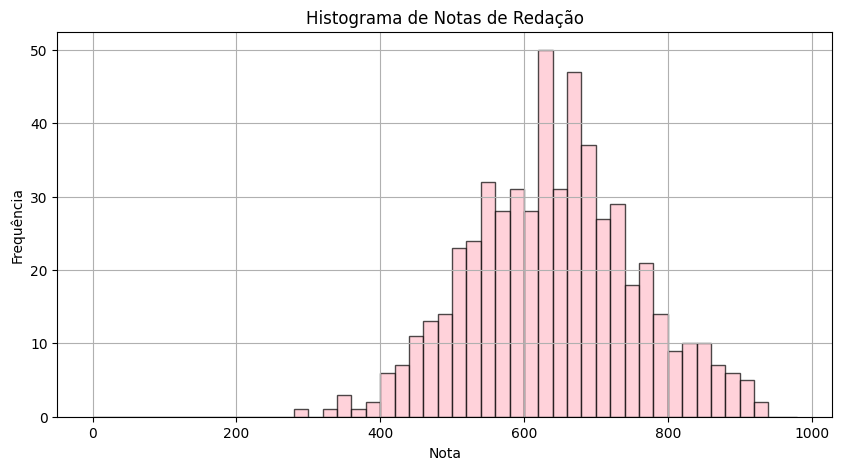

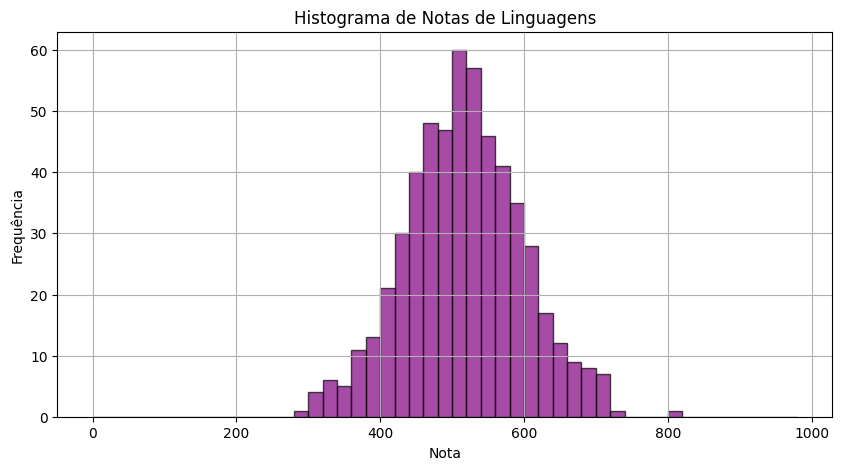

In [ ]:
intervalos = range(0,1000, 20)

# histograma de Redação
plt.figure(figsize=(10, 5))
plt.hist(df['Redação'], bins=intervalos, color='pink', edgecolor='black', alpha=0.7)
plt.title('Histograma de Notas de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# histograma de Linguagens
plt.figure(figsize=(10, 5))
plt.hist(df['Linguagens'], bins=intervalos, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histograma de Notas de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

*Analisando ambos os gráficos podemos dizer que eles tem sim, um alto grau de simetria, mas redação tem uma leve calda para a esquerda, podendo dizer que seriam outliers, já o grafico de linguagens tem um outlier na faixa de nota 800, mas é bem mais simetrico que o grafico de redação*

**7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])**

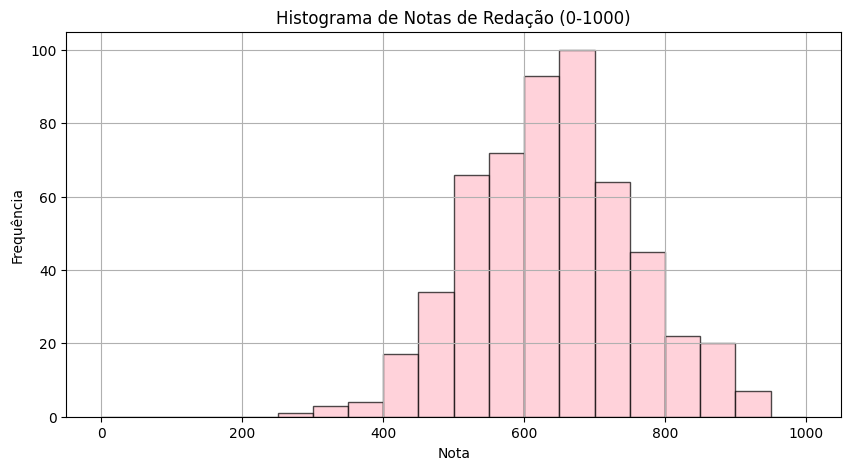

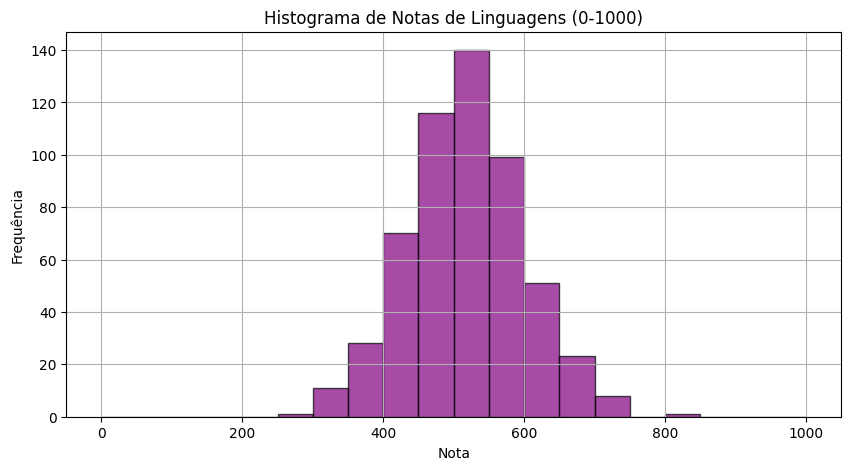

In [ ]:
range_fixo = [0, 1000]

# histograma de Redação com range fixo
plt.figure(figsize=(10, 5))
plt.hist(df['Redação'], bins=20, range=range_fixo, color='pink', edgecolor='black', alpha=0.7)
plt.title('Histograma de Notas de Redação (0-1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# histograma de Linguagens com range fixo
plt.figure(figsize=(10, 5))
plt.hist(df['Linguagens'], bins=20, range=range_fixo, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histograma de Notas de Linguagens (0-1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

*Sim, continuo afirmando que os graficos são simetricos, sendo possivel visualizar com esta range as caldas mais alongadas de ambas as matérias, mas seriam outliers devido a sua baixa frequencia*

**8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.**

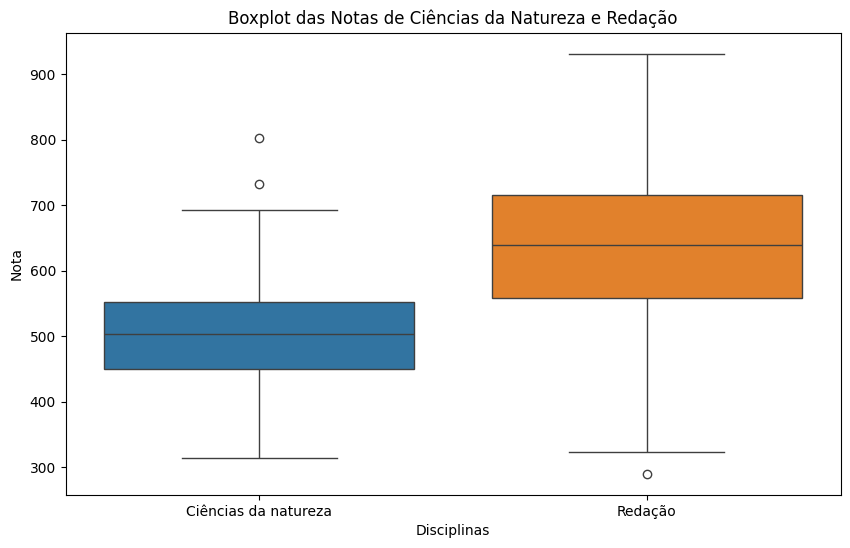

In [ ]:
df_ciencias_redacao = enem[['Ciências da natureza', 'Redação']]

# Criar o boxplot utilizando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ciencias_redacao)
plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.ylabel('Nota')
plt.xlabel('Disciplinas')
plt.show()

In [ ]:

##codigo simplificado da função acima
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], [0.25, 0.75]) ##para calcular os quartis 25 (Q1) e 75 (Q3)
    iqr = q75 - q25 ##calcula iqr
    lower, upper = q25 - 1.5 * iqr, q75 + 1.5 * iqr ##Calcula os limites inferior e superio do quartis
    outliers = [i for i in dataset[colname].values if i > upper or i < lower] ##Usa uma list comprehension para criar uma lista de valores que são identificados como outliers.
    print('IQR é', iqr)
    print('Valor mínimo:', lower)
    print('Valor máximo:', upper)
    print('O número de outliers encontrados foi de', len(outliers))
    return lower, upper, outliers ##retorna os valores calculados

IQR é 109.99743934269998
Valor mínimo: 297.65180891610004
Valor máximo: 737.6415662868999
O número de outliers encontrados foi de 2
IQR é 108.25660959517495
Valor mínimo: 313.4737071952626
Valor máximo: 746.5001455759624
O número de outliers encontrados foi de 3
IQR é 102.26240025932503
Valor mínimo: 296.6045346095625
Valor máximo: 705.6541356468626
O número de outliers encontrados foi de 2
IQR é 114.31677633677492
Valor mínimo: 305.5433065997877
Valor máximo: 762.8104119468874
O número de outliers encontrados foi de 3
IQR é 157.02513490047488
Valor mínimo: 322.98725564181274
Valor máximo: 951.0877952437122
O número de outliers encontrados foi de 1
IQR é 68.20681237116992
Valor mínimo: 412.9868499473977
Valor máximo: 685.8140994320773
O número de outliers encontrados foi de 0


<Figure size 1000x600 with 0 Axes>

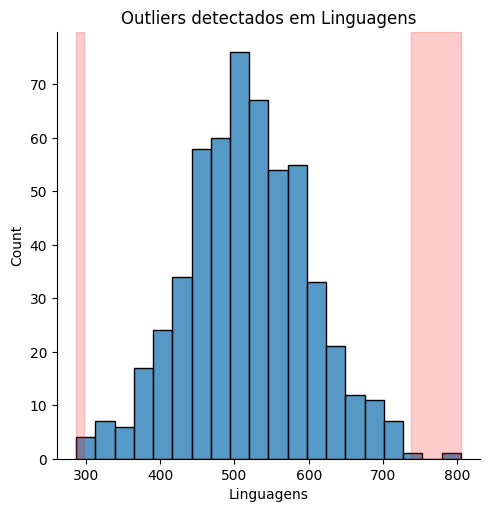

<Figure size 1000x600 with 0 Axes>

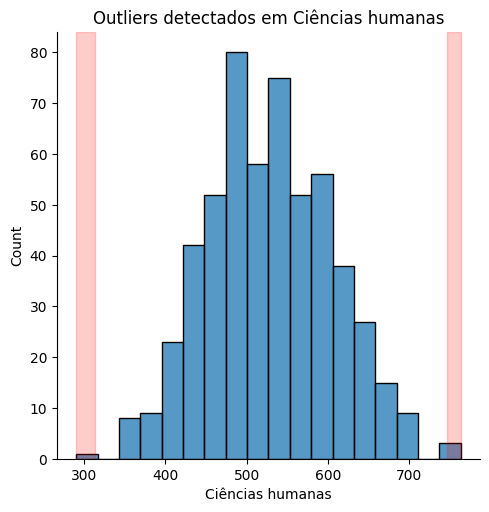

<Figure size 1000x600 with 0 Axes>

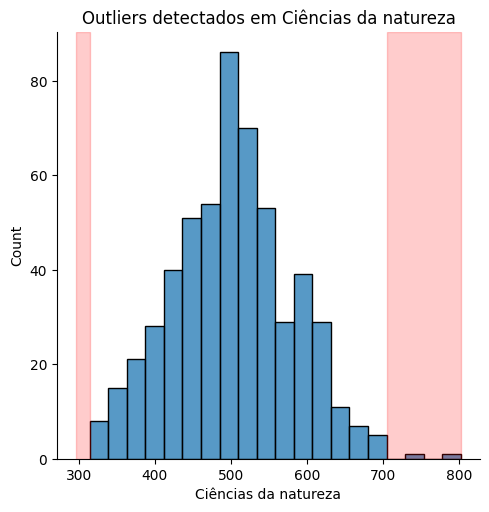

<Figure size 1000x600 with 0 Axes>

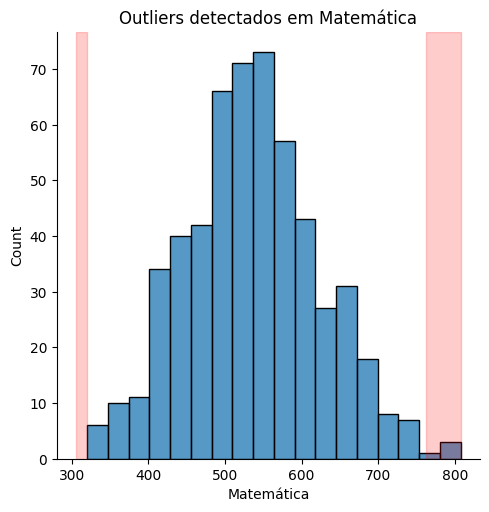

<Figure size 1000x600 with 0 Axes>

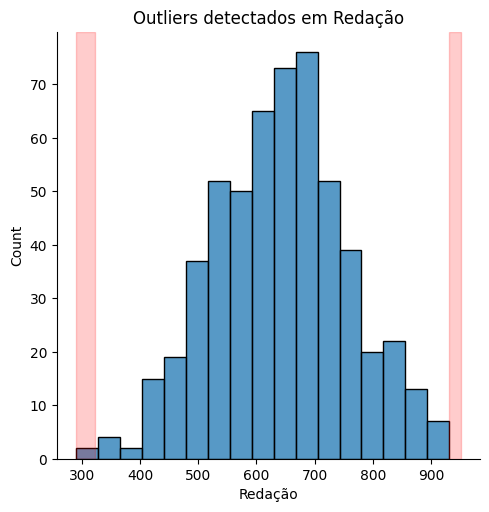

In [ ]:
for column in enem.select_dtypes(include=np.number).columns: ##cada coluna numérica no DataFrame
  lower, upper, out =  find_outlier_iqr(enem, column) ##para identificar os limites inferior e superior dos outliers.
  if (len(out) > 0): ##Verifica se foram encontrados outliers ## se (out) for maior que 0, significa que outliers foram encontrados.
    plt.figure(figsize = (10,6)) ##tamanho do grafico
    sns.displot(enem[column], kde=False) ##kde=False desativa a estimativa de densidade kernel
    plt.axvspan(xmin = lower,xmax= enem[column].min(),alpha=0.2, color='red') ##Adiciona duas faixas verticais no gráfico para destacar a área onde os outliers foram encontrado (inferior e superior)
    plt.axvspan(xmin = upper,xmax= enem[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

*Em ambos os modelos de analise, boxplot e IQR é possível ver que há a presença de outliers, mas que eles são bem poucos*

**9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)**

In [ ]:
#removendo utilizando método Z-score
def replace_na_outlier_zscore(dataset, threshold, colname):
    df = dataset[colname]
    zscore = (df - df.mean()) / df.std()
    val = np.where(np.abs(zscore) > threshold, np.nan, df)
    return val

In [ ]:
def drop_outliers(dataset, threshold):
    for column in dataset.select_dtypes(include=np.number).columns:
        dataset[column] = replace_na_outlier_zscore(dataset, threshold, column)
    return dataset.dropna()

In [ ]:
def replace_median_outliers(dataset, threshold):
    for column in dataset.select_dtypes(include=np.number).columns:
        dataset[column] = replace_na_outlier_zscore(dataset, threshold, column)
    return dataset.fillna(dataset.median())

In [ ]:
media_sem_outliers = enem[['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
media_sem_outliers

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [ ]:
mudança_percentual = ((media - media_sem_outliers) / media_sem_outliers) * 100
mudança_percentual

Linguagens              23.038289
Ciências humanas        20.503641
Ciências da natureza    26.793340
Matemática              18.524825
Redação                 -0.703436
dtype: float64

*É possivel inferir que a remoção de todos os outliers é passível de alterar a média nacional significativamente em todas as matérias, menos a de redação que teve uma queda de -0,7*

**10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.**

In [ ]:
#selecionando somente colunas numericas
colunas_numericas = enem.select_dtypes(include='number')

In [ ]:
#media antes da substituição
media_geral_original = colunas_numericas.stack().mean()
desvio_padrao_original = colunas_numericas.stack().std()

In [ ]:
#substituindo
df_media = colunas_numericas.fillna(colunas_numericas.mean())
df_moda = colunas_numericas.fillna(colunas_numericas.mode().iloc[0])
df_mediana = colunas_numericas.fillna(colunas_numericas.median())

In [ ]:
print("\nMédia geral antes substituição:")
print( media_geral_original)

print("\nMédia geral após substituição:")
print("Com média:", media_geral_media)
print("Com moda:", media_geral_moda)
print("Com mediana:", media_geral_mediana)

print("\nDesvio padrão geral antes substituição:")
print(desvio_padrao_original)

print("\nDesvio padrão geral após substituição:")
print("Com média:", desvio_padrao_media)
print("Com moda:", desvio_padrao_moda)
print("Com mediana:", desvio_padrao_mediana)


Média geral antes substituição:
542.6711273416437

Média geral após substituição:
Com média: 542.9263730172955
Com moda: 515.1347743209419
Com mediana: 542.834189794131

Desvio padrão geral antes substituição:
101.51639307718578

Desvio padrão geral após substituição:
Com média: 97.43089982820341
Com moda: 123.36423610882277
Com mediana: 97.35132379771272


*Analisando os resultados é possivel dizer que a substituição com a média e a mediana é o que menos distoa dos valores antes da substituição*